## Sorted Loading in Data (UPDATED)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.metrics import accuracy_score
from skimage.color import rgb2gray
import cv2
import pickle
from scipy.spatial.distance import cdist
import keras
from sklearn.svm import SVC

In [ ]:
#Paths Setup
train_data_path  = '/content/drive/Shareddrives/MLSP Project/train_set_small_new/train_set_small_new/images/'
train_labels_path  = '/content/drive/Shareddrives/MLSP Project/train_set_small_new/train_set_small_new/annotations/'
test_data_path = '/content/drive/Shareddrives/MLSP Project/val_set_small/val_set_small/images/'
test_labels_path = '/content/drive/Shareddrives/MLSP Project/val_set_small/val_set_small/annotations/'

In [ ]:
#GET NAMES OF EVERY TRAIN IMAGE FILE
import glob
train_files = glob.glob('/content/drive/Shareddrives/MLSP Project/TRAINIMAGES/*.jpg')

#GET NAMES OF EVERY TRAIN LABEL FILE
train_label_files = glob.glob('/content/drive/Shareddrives/MLSP Project/TRAIN_LABELS/*_exp.npy')

#GET NAMES OF EVERY TEST IMAGE FILE
test_files = glob.glob('/content/drive/Shareddrives/MLSP Project/val_set_small/val_set_small/images/*.jpg')

#GET NAMES OF EVERY TEST LABEL FILE
test_label_files = glob.glob('/content/drive/Shareddrives/MLSP Project/val_set_small/val_set_small/annotations/*_exp.npy')

In [ ]:
print(len(train_files))

2000


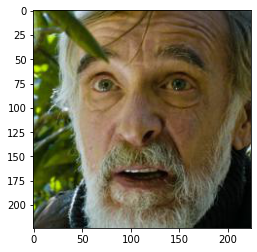

In [ ]:
#PRINT OUT A FILE TO SEE THAT WE ARENT CRAZY
img=imread(train_files[1])
plt.imshow(img)

In [ ]:
#SORT TRAIN IMAGE FILES
import re
train_files.sort(key=lambda f: int(re.sub('\D', '', f)))
train_files[0], train_files[1], train_files[2]

('/content/drive/Shareddrives/MLSP Project/TRAINIMAGES/105.jpg',
 '/content/drive/Shareddrives/MLSP Project/TRAINIMAGES/131.jpg',
 '/content/drive/Shareddrives/MLSP Project/TRAINIMAGES/1001.jpg')

In [ ]:
#SORT TRAIN LABEL FILES
train_label_files.sort(key=lambda f: int(re.sub('\D', '', f)))
train_label_files[0], train_label_files[1], train_label_files[2]

('/content/drive/Shareddrives/MLSP Project/TRAIN_LABELS/105_exp.npy',
 '/content/drive/Shareddrives/MLSP Project/TRAIN_LABELS/131_exp.npy',
 '/content/drive/Shareddrives/MLSP Project/TRAIN_LABELS/1001_exp.npy')

In [ ]:
#SORT TEST IMAGE FILES
test_files.sort(key=lambda f: int(re.sub('\D', '', f)))
test_files[0], test_files[1], test_files[2]

('/content/drive/Shareddrives/MLSP Project/val_set_small/val_set_small/images/0.jpg',
 '/content/drive/Shareddrives/MLSP Project/val_set_small/val_set_small/images/1.jpg',
 '/content/drive/Shareddrives/MLSP Project/val_set_small/val_set_small/images/2.jpg')

In [ ]:
#SORT TEST LABEL FILES
test_label_files.sort(key=lambda f: int(re.sub('\D', '', f)))
test_label_files[0], test_label_files[1], test_label_files[2]

('/content/drive/Shareddrives/MLSP Project/val_set_small/val_set_small/annotations/0_exp.npy',
 '/content/drive/Shareddrives/MLSP Project/val_set_small/val_set_small/annotations/1_exp.npy',
 '/content/drive/Shareddrives/MLSP Project/val_set_small/val_set_small/annotations/2_exp.npy')

In [ ]:
#GET TRAIN IMAGE MATRICES
from PIL import Image
train_img = np.array([np.array(Image.open(fname)) for fname in train_files])
train_img_flat=np.reshape(train_img, (2000,50176, 3))

In [ ]:
#GET TEST IMAGE MATRICES
test_img = np.array([np.array(Image.open(fname)) for fname in test_files])
test_img_flat=np.reshape(test_img, (356, 50176, 3))

In [ ]:
#LOAD IN LABELS FUNCTION
def load_annotations(label_files):
  labels=[]
  num_image=len(label_files)
  for i in range(num_image):
    variable=float(np.load(label_files[i]))
    labels.append(variable)
  labels=np.array(labels)
  return labels

In [ ]:
#TRAIN LABELS
train_labels=load_annotations(train_label_files)

In [ ]:
#TEST LABELS
test_labels=load_annotations(test_label_files)

In [ ]:
#Print Shapes:
print("Train Images Shape:",train_img.shape)
print("Test Images Shape:",test_img.shape)
print("Train Images Flattened Shape:",train_img_flat.shape)
print("Test Images Flattened Shape:",test_img_flat.shape)
print("Train Labels Shape:",train_labels.shape)
print("Test Labels Shape:",test_labels.shape)

Train Images Shape: (2000, 224, 224, 3)
Test Images Shape: (356, 224, 224, 3)
Train Images Flattened Shape: (2000, 50176, 3)
Test Images Flattened Shape: (356, 50176, 3)
Train Labels Shape: (2000,)
Test Labels Shape: (356,)


## Build Dataframe + Data Analysis

In [ ]:
import pandas as pd
df = pd.DataFrame(train_files)
df['Class']=train_labels
df.head()

,0,Class
0,/content/drive/Shareddrives/MLSP Project/TRAIN...,1.0
1,/content/drive/Shareddrives/MLSP Project/TRAIN...,7.0
2,/content/drive/Shareddrives/MLSP Project/TRAIN...,1.0
3,/content/drive/Shareddrives/MLSP Project/TRAIN...,1.0
4,/content/drive/Shareddrives/MLSP Project/TRAIN...,1.0


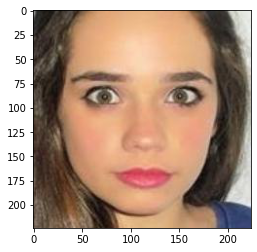

In [ ]:
img=imread(train_files[1374])
plt.imshow(img)

In [ ]:
train_labels[1374]

3.0

#### Our Labels Are:
0: Neutral 1: Happy 2:Angry 3:Sad 4:Fear 5:Surprise 6:Disgust 7:Contempt

SO THIS MATCHES!


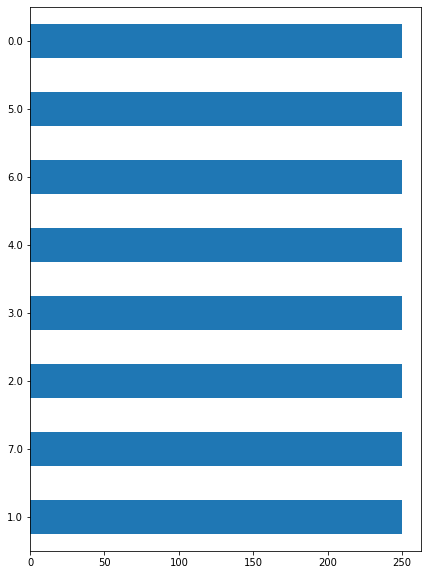

In [ ]:
plt.figure(figsize=(7,10))
df.Class.value_counts().plot(kind='barh')

## OLD LOADING IN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from skimage.color import rgb2gray
import cv2
from sklearn.cluster import KMeans
import pickle
from scipy.spatial.distance import cdist

In [ ]:
#Paths Setup
train_data_path  = '/content/drive/Shareddrives/MLSP Project/train_set_small/train_set_small/images/'
train_labels_path  = '/content/drive/Shareddrives/MLSP Project/train_set_small/train_set_small/annotations/'
test_data_path = '/content/drive/Shareddrives/MLSP Project/val_set_small/val_set_small/images/'
test_labels_path = '/content/drive/Shareddrives/MLSP Project/val_set_small/val_set_small/annotations/'

In [ ]:
def load_images(datapath):
  num_img=1
  for path in os.listdir(datapath):  
    num_img+=1
  img_matrix=np.zeros((((num_img,224,224,3))))
  img_matrix_flattened=np.zeros(((num_img,224*224,3)))
  count=0
  for path in os.listdir(datapath):
    img=imread(datapath+path)
    if count==3:
      plt.imshow(img)
    img=img.astype(int)
    img_matrix[count,:,:,:]=img
    img_f=img.reshape(img.shape[0]*img.shape[1],3)
    img_matrix_flattened[count,:,:]=img_f
    count+=1
  
  return img_matrix, img_matrix_flattened

In [ ]:
def load_annotations(datapath):
  num_img=1
  for path in os.listdir(datapath):
    if "_exp.npy" in path:  
      num_img+=1
  labels=np.zeros(num_img)
  count=0
  for path in os.listdir(datapath):
    if "_exp.npy" in path:
      variable=np.load(datapath+path)
      labels[count]=variable 
      count+=1
  return labels

In [ ]:
#Load All Images(Train/Test)
train_img,train_img_flat=load_images(train_data_path)
test_img,test_img_flat=load_images(test_data_path)
#Load All Labels
train_labels=load_annotations(train_labels_path)
test_labels=load_annotations(test_labels_path)

#Print Shapes:
print("Train Images Shape:",train_img.shape)
print("Test Images Shape:",test_img.shape)
print("Train Images Flattened Shape:",train_img_flat.shape)
print("Test Images Flattened Shape:",test_img_flat.shape)
print("Train Labels Shape:",train_labels.shape)
print("Test Labels Shape:",test_labels.shape)

# Initial SVM Model For Classification on RAW features

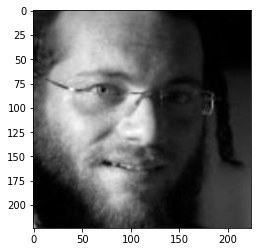

In [ ]:
train_gray=np.zeros((train_img.shape[0],train_img.shape[1]*train_img.shape[2]))
test_gray=np.zeros((test_img.shape[0],test_img.shape[1]*test_img.shape[2]))
for i,img in enumerate(train_img):
  train_gray[i,:]=rgb2gray(img).reshape(img.shape[0]*img.shape[1])
for i,img in enumerate(test_img):
  test_gray[i,:]=rgb2gray(img).reshape(img.shape[0]*img.shape[1])
plt.imshow(train_gray[3,:].reshape(224,224),cmap=plt.cm.gray)

In [ ]:
#Testing SVM with Different Kernels
kernel=["linear","rbf","poly"]
acc=np.zeros(len(kernel))
count=0
for k in kernel:
    svm = SVC(kernel=k, C=1)
    svm.fit(train_gray, train_labels)
    p = svm.predict(test_gray)
    a= accuracy_score(test_labels,p)
    acc[count]=a
    print("Accuracy for "+k+" kernel:",acc[count])
    count+=1

Accuracy for linear kernel: 0.25
Accuracy for rbf kernel: 0.24157303370786518
Accuracy for poly kernel: 0.2443820224719101


# Feature Extraction Using SIFT

In [ ]:
def sift(data):
  sift_descrp=[]
  sift_plot=[]
  count=1
  fig, axs=plt.subplots(5,2,figsize=(20,20))
  fig.suptitle('Original Image vs SIFT Features', fontsize=20)
  for i in range(data.shape[0]):
    img=data[i,:,:,:].astype(np.uint8)
    # Convert Image to Grayscale
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # Use the SIFT detector to extract descriptors
    sift = cv2.xfeatures2d.SIFT_create()
    _, descrp = sift.detectAndCompute(gray, None)
    sift_plot.append(sift.detect(gray, None)) 
    sift_descrp.append(descrp) #Store the descriptors
    if i in [0,15,98,130,300]:
      plt.subplot(5,2,count)
      plt.imshow(img)
      # Show the keypoints on the image (display a few images)
      img_sift=cv2.drawKeypoints(gray,sift_plot[i],img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
      cv2.imwrite("/content/drive/Shareddrives/MLSP Project/results/"+f'image{i}-with-keypoints.jpg',img_sift)

      # Display SIFT Features on Image
      plt.subplot(5,2,count+1)
      plt.imshow(img_sift)
      #cv2_imshow(img_sift)
      count=count+2
  return  sift_descrp

In [ ]:
#Implement Kmeans and Bag of Words on SIFT descriptors
def sift_kmeans(clusters,sift_descrp):
    bag_of_words = []
    kmeans = KMeans(n_clusters = clusters)
    kmeans.fit(sift_descrp) #Fit kmeans on extracted sift descriptors
    bag_of_words = kmeans.cluster_centers_ #Find cluster centers to store in pkl file
    if not os.path.isfile('/content/drive/Shareddrives/MLSP Project/results/dict_b.pkl'):
        pickle.dump(bag_of_words, open('/content/drive/Shareddrives/MLSP Project/results/dict_b.pkl', 'wb'))
    return bag_of_words

#Extract Final SIFT features for SVM Input
def features_sift(clusters,sift_features, bag_of_words):
    features_final = []
    for j in range(len(sift_features)):
        features = np.zeros(clusters)
        if sift_features[j] is not None:
          d = cdist(sift_features[j].reshape(1,-1), bag_of_words)
          argmin = np.argmin(d, axis = 1)
          for i in argmin:
            features[i]+=1
        features_final.append(features)
    return features_final

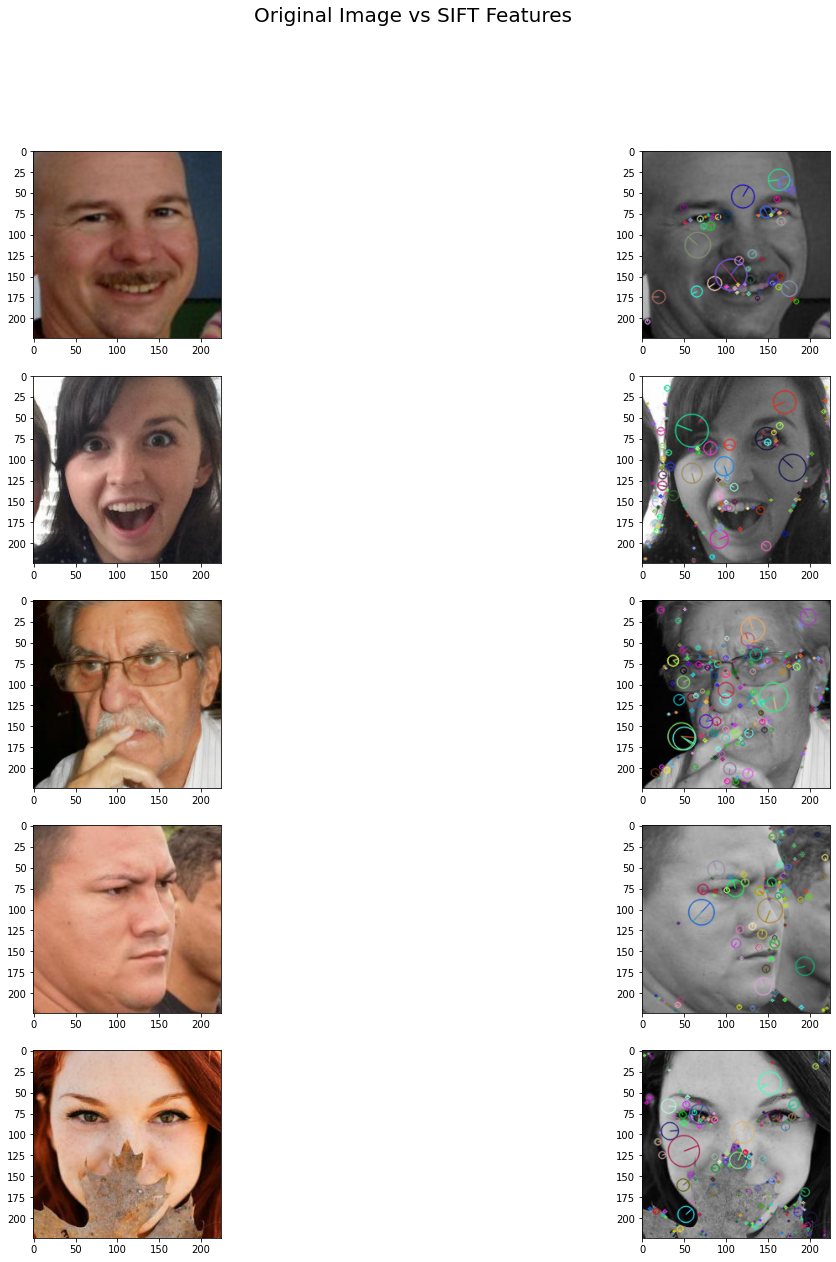

In [ ]:
sf_train=sift(train_img)

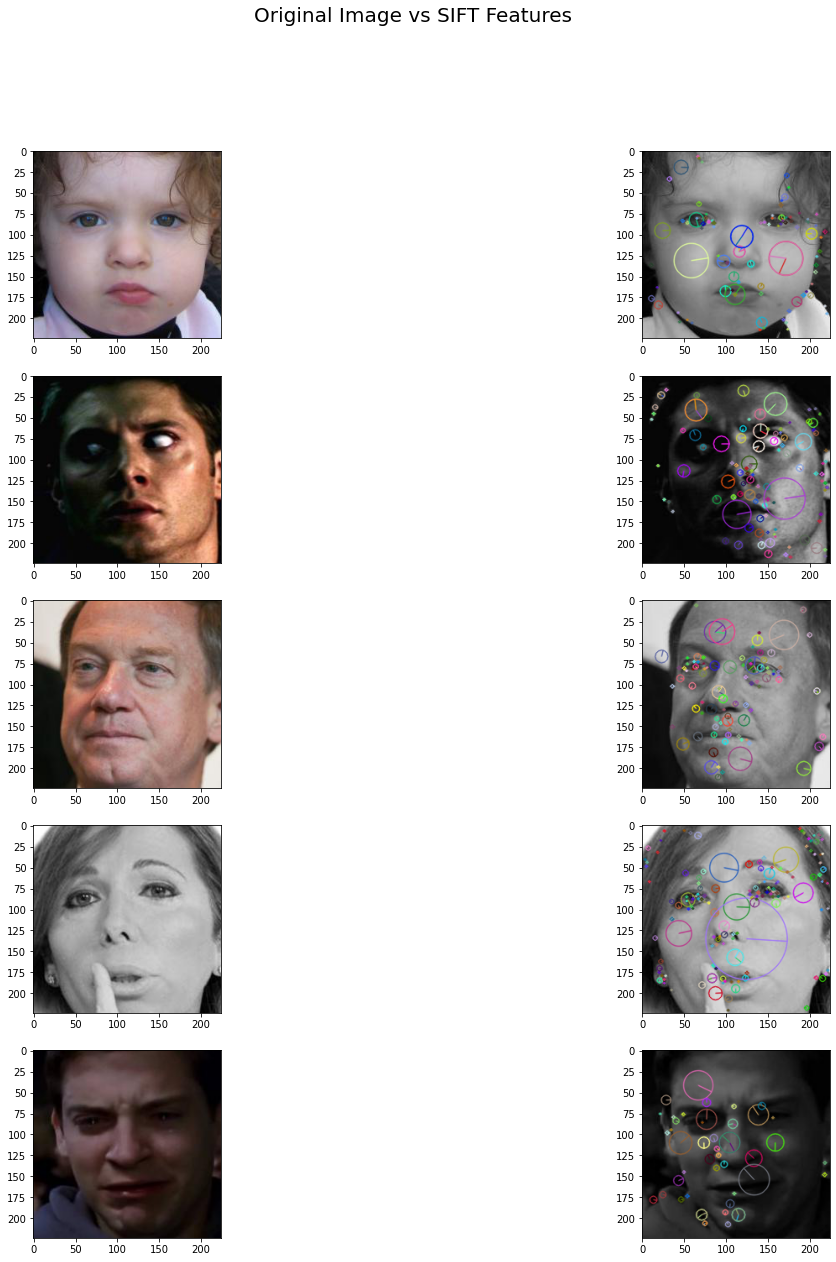

In [ ]:
sf_test=sift(test_img)

# SVM with SIFT

In [ ]:
#Modify our descriptors to be in samples vs features format and get rid of none type descriptors
descriptors_final = []
for i in sf_train:
    if i is not None:
        for des in i:
            descriptors_final.append(des)

sf_train_new=np.asarray(descriptors_final)
print("SIFT Features Train Shape:",sf_train_new.shape)

descriptors_final = []
for i in sf_test:
    if i is not None:
        for des in i:
            descriptors_final.append(des)
sf_test_new=np.asarray(descriptors_final)
print("SIFT Features Test Shape:",sf_test_new.shape)

SIFT Features Train Shape: (319061, 128)
SIFT Features Test Shape: (56446, 128)


In [ ]:
#Creating a new label set for SIFT Features
print(len(sf_train)) #Each one is a matrix of n (128 dimensional) sift descriptor vectors
                      #Need to assign a label to each of the n vectors belonging to a certain image
print((sf_train[2].shape))

labels_sift_train=[]
for i in range(len(sf_train)): #Loop through 1376 images
  if sf_train[i] is not None:
    num_disc=sf_train[i].shape[0] #Extract the number of sift descriptor in each image
    label=train_labels[i] #Get the value from original labels
    labels_sift_train.append(np.repeat(label,num_disc))#Create new label with repeated value corresponding to number of SIFT descriptors
labels_sift_train=np.concatenate(labels_sift_train)
print(labels_sift_train.shape)
#labels_sift_test=np.zeros(sf_test_new.shape[0]) #56446
labels_sift_test=[]
for i in range(len(sf_test)): #Loop through  images
  if sf_test[i] is not None:
    num_disc=sf_test[i].shape[0] 
    label=test_labels[i] 
    labels_sift_test.append(np.repeat(label,num_disc))
labels_sift_test=np.concatenate(labels_sift_test)
print(labels_sift_test.shape)

2000
(128, 128)
(319061,)
(56446,)


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#SVM with SIFT Features
bow_train = sift_kmeans(20,sf_train_new)
bow_test=sift_kmeans(20,sf_test_new)
features_train = features_sift(20,sf_train_new, bow_train)
features_test=features_sift(20,sf_test_new, bow_test)

#Testing SVM with Different Kernels
kernel=["rbf"]
acc_sift=np.zeros(len(kernel))
count=0
for k in kernel:
    svm = SVC(kernel=k, C=1)
    svm.fit(features_train, labels_sift_train)
    p = svm.predict(features_test)
    a= accuracy_score(labels_sift_test,p)
    acc_sift[count]=a
    print("Accuracy for "+k+" kernel with SIFT Features:",acc_sift[count])
    count+=1

Accuracy for linear kernel with SIFT Features: 0.12326825638663501


In [ ]:
print(len(features_train))
print(len(features_test))
print(features_train[900].shape)
print(features_train[900])

223648
56446
(200,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0.]
